In [1]:
import pandas as pd

In [2]:
covid = pd.read_csv("Casos_positivos_de_COVID-19_en_Colombia._20250112.csv", sep=";", nrows=500000)
covid.head()

C:\Users\mfeom\AppData\Local\Temp\ipykernel_16288\3347346127.py:1: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  covid = pd.read_csv("Casos_positivos_de_COVID-19_en_Colombia._20250112.csv", sep=";", nrows=500000)


,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,2020-12-24 00:00:00,"1,556,979",2020-12-22 00:00:00,76,VALLE,"76,001",CALI,67,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6,NaN
1,2020-12-24 00:00:00,"1,556,980",2020-12-19 00:00:00,76,VALLE,"76,001",CALI,66,1,F,...,NaN,NaN,Recuperado,2020-12-07 00:00:00,NaN,2020-12-23 00:00:00,2020-12-25 00:00:00,Tiempo,6,NaN
2,2020-12-24 00:00:00,"1,556,981",2020-12-19 00:00:00,76,VALLE,"76,001",CALI,68,1,F,...,NaN,NaN,Recuperado,2020-12-18 00:00:00,NaN,2020-12-22 00:00:00,2021-01-01 00:00:00,Tiempo,6,NaN
3,2020-12-24 00:00:00,"1,556,982",2020-12-22 00:00:00,76,VALLE,"76,001",CALI,74,1,F,...,NaN,NaN,Fallecido,2020-12-17 00:00:00,2020-12-30 00:00:00,2020-12-23 00:00:00,NaN,NaN,6,NaN
4,2020-12-24 00:00:00,"1,556,983",2020-12-22 00:00:00,76,VALLE,"76,001",CALI,65,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6,NaN


In [3]:
print(covid['Estado'].head(10))


0         Leve
1         Leve
2         Leve
3    Fallecido
4         Leve
5         Leve
6         Leve
7    Fallecido
8         Leve
9         Leve
Name: Estado, dtype: object


In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   fecha reporte web             500000 non-null  object
 1   ID de caso                    500000 non-null  object
 2   Fecha de notificación         500000 non-null  object
 3   Código DIVIPOLA departamento  500000 non-null  object
 4   Nombre departamento           500000 non-null  object
 5   Código DIVIPOLA municipio     500000 non-null  object
 6   Nombre municipio              500000 non-null  object
 7   Edad                          500000 non-null  int64 
 8   Unidad de medida de edad      500000 non-null  int64 
 9   Sexo                          500000 non-null  object
 10  Tipo de contagio              500000 non-null  object
 11  Ubicación del caso            497693 non-null  object
 12  Estado                        497693 non-null  object
 13 

In [5]:
covid.value_counts("Tipo de recuperación")

Tipo de recuperación
Tiempo    391135
PCR        93365
Name: count, dtype: int64

In [6]:
print(covid['Estado'].value_counts())

Estado
Leve         483956
Fallecido     13629
leve            108
Name: count, dtype: int64


In [12]:
duplicados = covid.duplicated()
covid = covid.drop_duplicates()
covid.isna().sum()

fecha reporte web                    0
ID de caso                           0
Fecha de notificación                0
Código DIVIPOLA departamento         0
Nombre departamento                  0
Código DIVIPOLA municipio            0
Nombre municipio                     0
Edad                                 0
Unidad de medida de edad             0
Sexo                                 0
Tipo de contagio                     0
Ubicación del caso                2307
Estado                            2307
Código ISO del país             499763
Nombre del país                 499763
Recuperado                        1871
Fecha de inicio de síntomas      46315
Fecha de muerte                 484064
Fecha de diagnóstico               271
Fecha de recuperación            15500
Tipo de recuperación             15500
Pertenencia étnica                   0
Nombre del grupo étnico         492620
dtype: int64

In [13]:
covid['Fecha de inicio de síntomas'] = pd.to_datetime(covid['Fecha de inicio de síntomas'], errors='coerce')
covid['Fecha de diagnóstico'] = pd.to_datetime(covid['Fecha de diagnóstico'], errors='coerce')
covid['Fecha de muerte'] = pd.to_datetime(covid['Fecha de muerte'], errors='coerce')
covid['Fecha de recuperación'] = pd.to_datetime(covid['Fecha de recuperación'], errors='coerce')

In [14]:
covid['sobrevivio'] = covid['Fecha de muerte'].isna().astype(int)

In [15]:
covid['dias_diagnostico'] = (covid['Fecha de diagnóstico'] - covid['Fecha de inicio de síntomas']).dt.days

In [16]:
analisis = covid[['dias_diagnostico', 'sobrevivio']].dropna()

In [17]:
print("Promedio de días entre síntomas y diagnóstico:")
print(analisis.groupby('sobrevivio')['dias_diagnostico'].mean())

Promedio de días entre síntomas y diagnóstico:
sobrevivio
0    9.497069
1    8.898169
Name: dias_diagnostico, dtype: float64


<Axes: xlabel='sobrevivio', ylabel='dias_diagnostico'>

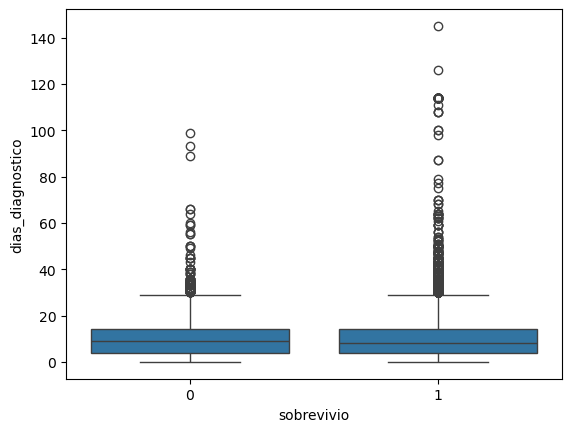

In [18]:
import seaborn as sns
sns.boxplot(x='sobrevivio', y='dias_diagnostico', data=covid)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Copia para no alterar tu dataset original
data = covid[['Edad', 'Sexo', 'Tipo de contagio', 'Ubicación del caso', 'dias_diagnostico', 'sobrevivio']].dropna()

# Codificar variables categóricas
le = LabelEncoder()
for col in ['Sexo', 'Tipo de contagio', 'Ubicación del caso']:
    data[col] = le.fit_transform(data[col])

# Separar variables predictoras y objetivo
X = data.drop('sobrevivio', axis=1)
y = data['sobrevivio']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.head())
print(y.value_counts())  # Para ver cuántos sobrevivieron vs no


   Edad  Sexo  Tipo de contagio  Ubicación del caso  dias_diagnostico
0    67     0                 0                   1               2.0
1    66     0                 0                   1              16.0
2    68     0                 0                   1               4.0
3    74     0                 0                   2               6.0
4    65     0                 0                   1               2.0
sobrevivio
1    437568
0     13617
Name: count, dtype: int64


In [27]:
print(modelo_df['dias_diagnostico'].describe())


count    451185.000000
mean          8.916050
std           5.782817
min           0.000000
25%           4.000000
50%           8.000000
75%          14.000000
max         145.000000
Name: dias_diagnostico, dtype: float64


In [30]:
columns_with_missing = covid.isna().sum()[covid.isna().sum() > 0]
columns_with_missing.sort_values(ascending=False)

Código ISO del país        452280
Nombre del país            452280
Nombre del grupo étnico    445643
Fecha de muerte            436744
Fecha de recuperación       15356
Tipo de recuperación        15356
Ubicación del caso           2237
Estado                       2237
Recuperado                   1824
dtype: int64

In [31]:
threshold_colum = len(covid) * 0.3
cols_to_drop = covid.columns[covid.isna().sum() > threshold_colum]
cols_to_drop = cols_to_drop.append(pd.Index(['ID de caso']))
print(cols_to_drop)

Index(['Código ISO del país', 'Nombre del país', 'Fecha de muerte',
       'Nombre del grupo étnico', 'ID de caso'],
      dtype='object')


In [32]:
covid.drop(columns=cols_to_drop, inplace=True)

In [33]:
missing_values_after_drop = covid.isnull().sum()
columns_with_missing_after_drop = missing_values_after_drop[missing_values_after_drop > 0]
columns_with_missing_after_drop 

Ubicación del caso        2237
Estado                    2237
Recuperado                1824
Fecha de recuperación    15356
Tipo de recuperación     15356
dtype: int64

In [35]:
categorical_columns = ['Ubicación del caso', 'Estado', 'Recuperado', 'Fecha de recuperación', 'Tipo de recuperación']
for col in categorical_columns:
    covid[col] = covid[col].fillna(covid[col].mode()[0])

In [34]:
covid.head()

,fecha reporte web,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Recuperado,Fecha de inicio de síntomas,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,sobrevivio,dias_diagnostico
0,2020-12-24 00:00:00,2020-12-22 00:00:00,76,VALLE,"76,001",CALI,67,1,F,Comunitaria,Casa,Leve,Recuperado,2020-12-21,2020-12-23,2021-01-04,Tiempo,6,1,2.0
1,2020-12-24 00:00:00,2020-12-19 00:00:00,76,VALLE,"76,001",CALI,66,1,F,Comunitaria,Casa,Leve,Recuperado,2020-12-07,2020-12-23,2020-12-25,Tiempo,6,1,16.0
2,2020-12-24 00:00:00,2020-12-19 00:00:00,76,VALLE,"76,001",CALI,68,1,F,Comunitaria,Casa,Leve,Recuperado,2020-12-18,2020-12-22,2021-01-01,Tiempo,6,1,4.0
3,2020-12-24 00:00:00,2020-12-22 00:00:00,76,VALLE,"76,001",CALI,74,1,F,Comunitaria,Fallecido,Fallecido,Fallecido,2020-12-17,2020-12-23,NaT,NaN,6,0,6.0
4,2020-12-24 00:00:00,2020-12-22 00:00:00,76,VALLE,"76,001",CALI,65,1,F,Comunitaria,Casa,Leve,Recuperado,2020-12-21,2020-12-23,2021-01-04,Tiempo,6,1,2.0
